# Imports

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
import joblib # to stock the model

# Diabetes Database

The "Diabetes" database is available on [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). This dataset contains information on female patients aged at least 21 years old from Pima Indian populations, who were examined to determine if they had type 2 diabetes. The features include measurements such as height, weight, age, number of pregnancies, blood pressure, and more.

## Dataset Contents

The database includes the following columns:

- `Pregnancies`: Number of pregnancies
- `Glucose`: Plasma glucose concentration (fasting)
- `BloodPressure`: Diastolic blood pressure (mm Hg)
- `SkinThickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-hour serum insulin (mu U/ml)
- `BMI`: Body mass index (kg/m²)
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Target variable indicating whether the patient has diabetes (0 = non-diabetic, 1 = diabetic)

## Analysis Objective

The objective of this analysis is to build a classification model to predict if a patient has type 2 diabetes based on clinical characteristics. This dataset will be divided into training and testing sets to train and evaluate model performance.


# Data loading and cleaning

In [3]:
# data loading
diabetes=pd.read_csv("data/diabetes.csv")

In [4]:

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# print dataframe infos
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 768 observations in the database.

## Data splitting : train set and test set

We split the sata set into two sets : test set and train set

# Random Forest Modeling
The Random Forest algorithm is an ensemble learning method based on decision trees. It builds multiple decision trees and merges them to obtain more accurate and stable predictions.

### Data Preparation for the Model

In [6]:
from sklearn.model_selection import train_test_split

X = diabetes.drop('Outcome', axis=1)  # predictor variables
y = diabetes['Outcome']  #target variable

# split ,80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## Model with Optimization Using Practical Threshold
In classification, adjusting the decision threshold can improve model performance based on specific needs, especially for imbalanced data.


When using a Random Forest, it is essential to make thoughtful choices for certain parameters to optimize the model’s performance. Two important parameters to consider are:

- `max_features`: This is the maximum depth of each decision tree in the forest. An appropriate value for `max_features` helps control model complexity and prevents overfitting.

**A common approach is to set `max_features` to the square root of the number of features used**. This approach limits the depth of the trees to prevent excessive growth, while maintaining a good balance between underfitting and overfitting.

- `n_estimators`: This is the number of decision trees in the random forest. A sufficiently large number of trees can improve model performance. However, it's important to note that increasing `n_estimators` also increases computation time. In practice, we aim to find a compromise between model performance and available computation time.

**Empirical studies have shown that adding more trees beyond a certain point provides only marginal performance gains**.

By appropriately tuning these parameters, a well-balanced and high-performing random forest can be obtained for the given task.



### Training

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Calculate the maximum number of features (max_features) as the square root
max_features = int(np.sqrt(X.shape[1]))

# Create the random forest with specified hyperparameters, n_estimators = number of trees in each forest
random_forest = RandomForestClassifier(n_estimators=400, max_features=max_features, random_state=None, oob_score=True)

# Train the model on the training data
random_forest.fit(X_train, y_train)


RandomForestClassifier(max_features=2, n_estimators=400, oob_score=True)

### Predictions on the Training and Testing Sets

Once the Random Forest model is trained, we can make predictions on both the training and testing datasets. Here's how to do it:

In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)


### Model Performance

After making predictions on the training and testing sets, it’s important to evaluate the model’s performance.

In [10]:
# Calculate performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Create the performance evaluation table
performance_table = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC', 'Recall'],
    'Training Set': [train_accuracy, train_auc, train_recall],
    'Testing Set': [test_accuracy, test_auc, test_recall]
})

# Display the performance evaluation table
print(performance_table)



     Metric  Training Set  Testing Set
0  Accuracy           1.0     0.733766
1       AUC           1.0     0.708081
2    Recall           1.0     0.618182


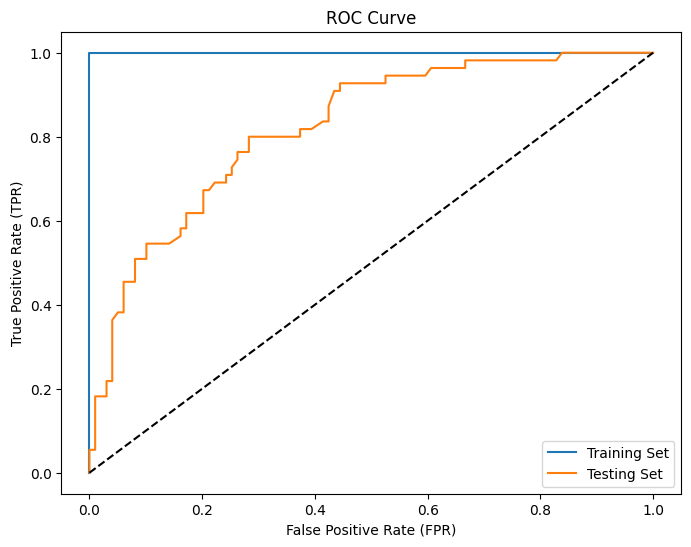

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get probability scores for the positive classes
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculate false positive rates (FPR) and true positive rates (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Training Set')
plt.plot(test_fpr, test_tpr, label='Testing Set')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()



### Feature Importance

Understanding the importance of features in our model helps us identify which variables contribute the most to the predictions. In a Random Forest model, we can easily extract the feature importances using the feature_importances_ attribute.

Feature Importance:
                    Feature  Importance
0                   Glucose    0.253456
1                       BMI    0.165384
2                       Age    0.145623
3  DiabetesPedigreeFunction    0.122857
4             BloodPressure    0.088875
5               Pregnancies    0.081296
6                   Insulin    0.071347
7             SkinThickness    0.071162



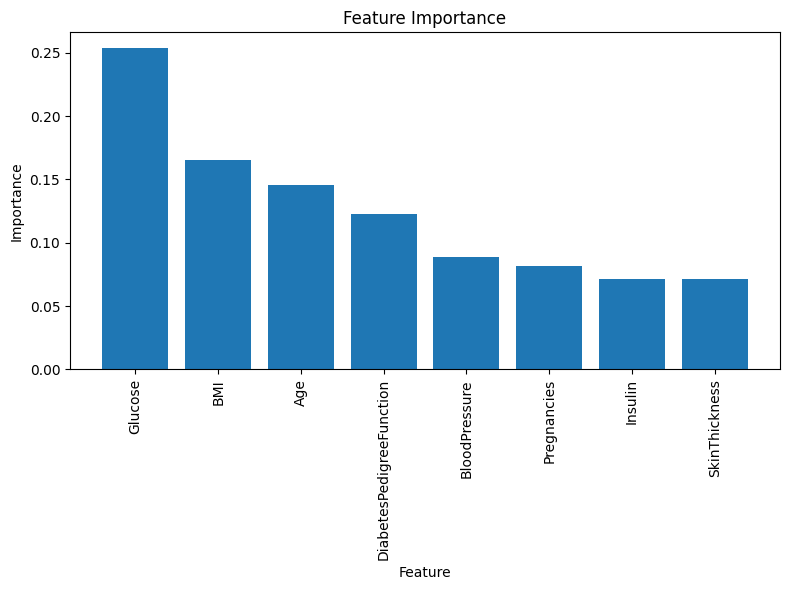

In [12]:
# Get feature importance
importance = random_forest.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display feature importance
print("Feature Importance:")
print(importance_df)
print()

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


### Observation: Glucose Level as a Determinant for Diabetes

It can be observed that the glucose level is the most determining factor in predicting whether a person will have diabetes or not. This insight underscores the critical role of glucose concentration in diagnosing and understanding diabetes risk. High glucose levels are often associated with insulin resistance and other metabolic issues, making them a key indicator for healthcare professionals.

## Model Serialization in PKL Format

Model serialization refers to the process of converting a trained machine learning model into a format that can be saved to disk and later loaded for use without needing to retrain it. One common format for this purpose is PKL (Pickle).

Using PKL allows us to efficiently store our model’s structure and parameters in a binary format, making it easy to save and load the model as needed. This is particularly useful for deploying our model, as it ensures that we can easily restore the exact state of your model for making predictions.

In [13]:

joblib.dump(random_forest, 'random_forest_model.pkl')

['random_forest_model.pkl']